In [16]:
from transformers import GPT2LMHeadModel, pipeline, set_seed
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [4]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

token embedding:

50257: n of tokens in gpt2 vocab

768: dimension of each token embedding

positional embeddings:

max sequence len: 1024

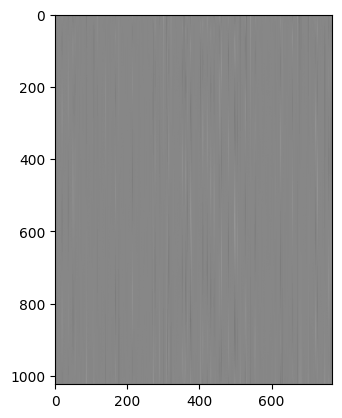

In [9]:
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="grey")

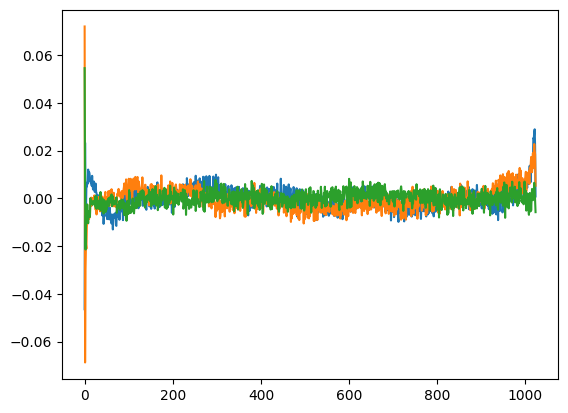

In [12]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 350])
plt.plot(sd_hf["transformer.wpe.weight"][:,767])

In [24]:
gen = pipeline("text-generation", model="gpt2", device="cuda")
set_seed(420)
gen("question: hey man, how is it going. answer: ", max_length=30, num_return_sequences=5, truncation=True)

/home/pt/hacking/dpt/.venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'question: hey man, how is it going. answer: ikat, i wanted to see "man\'s" faces again and get back to'},
 {'generated_text': 'question: hey man, how is it going. answer: ive never been in this house yet. it works.\n\nanon362795'},
 {'generated_text': 'question: hey man, how is it going. answer: __________\n\nAnswer:\n\nWe are going in for a hard start,'},
 {'generated_text': "question: hey man, how is it going. answer: ikon: it feels kinda bad to get asked about this. man: I'd"},
 {'generated_text': 'question: hey man, how is it going. answer: _____.\n\nDear theres an important subject for me as well. What is'}]